In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### A. Preprocessing Steps:
1. Check for missing values / duplicates. 
2. Explore data structure and relationships. 
3. Encode variables and scale features.
4. Split data into training and test set

In [3]:
# read csv
data = pd.read_csv('Student_Performance.csv')

# number of students - 10000 students
len(data)

# check for any missing values
data.isna().sum()

# check for duplicate values -  127 students have same values across all columns
data[data.duplicated()]

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9,52,No,5,9,48.0
1477,7,61,Yes,6,8,54.0
1601,5,99,No,7,5,89.0
1786,2,62,Yes,9,4,40.0
2026,5,87,Yes,6,7,74.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [4]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


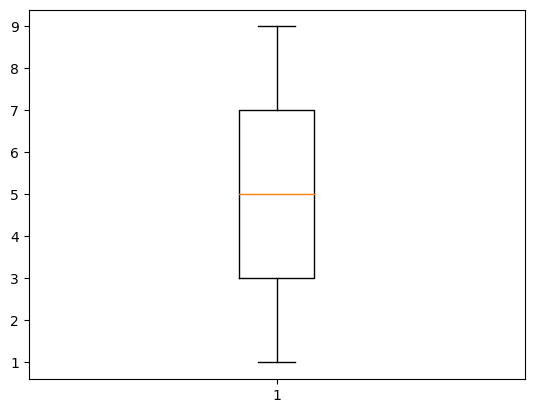

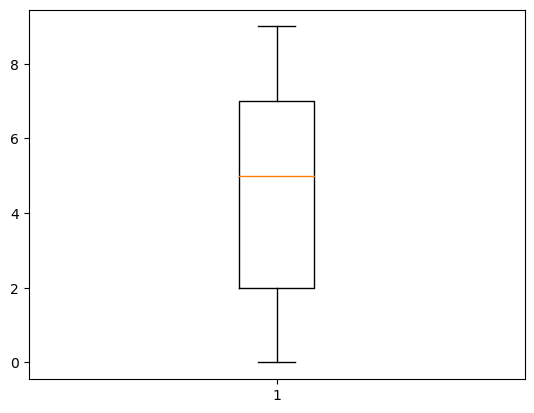

In [6]:
# distribution of variables
plt.boxplot(data['Hours Studied'])

plt.show()
plt.boxplot(data['Sample Question Papers Practiced'])
plt.show()

In [ ]:
# feature engineering
data['study_sleep_ratio'] = data['Hours Studied'] / data['Sleep Hours']
data['question_score_ratio'] = data['Sample Question Papers Practiced'] / data['Previous Scores']

In [ ]:
# distribution of hours studied
hours_studied_count = data.groupby('Hours Studied').count()['Previous Scores'].reset_index()
hours_studied_count.rename(columns={'Previous Scores' : 'Hours Count'}, inplace=True)

previous_scores_count = data.groupby('Previous Scores').count()['Hours Studied'].reset_index()
previous_scores_count.rename(columns={'Hours Studied' : 'Previous Scores Count'}, inplace=True)

extra_count =data.groupby('Extracurricular Activities').count()['Hours Studied'].reset_index()
extra_count.rename(columns={'Hours Studied' : 'Extra Count'}, inplace=True)


Hours Studied
(0.992, 1.4]    1152
(5.8, 6.2]      1133
(6.6, 7.0]      1129
(2.6, 3.0]      1119
(8.6, 9.0]      1115
(4.6, 5.0]      1094
(7.8, 8.2]      1088
(3.8, 4.2]      1085
(1.8, 2.2]      1085
(3.0, 3.4]         0
(3.4, 3.8]         0
(4.2, 4.6]         0
(1.4, 1.8]         0
(5.4, 5.8]         0
(2.2, 2.6]         0
(6.2, 6.6]         0
(7.0, 7.4]         0
(7.4, 7.8]         0
(8.2, 8.6]         0
(5.0, 5.4]         0
Name: count, dtype: int64